<a href="https://colab.research.google.com/github/allegheny-college-cmpsc-101-fall-2023/course-materials/blob/main/Notes/Filled/CMPSC101_F2023_complexity_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complexity continued

In [3]:
import matplotlib.pyplot as plt
import math

"Steps"
- variable assignment
- arithmetic operation
- comparisons
- return
- index to a given location

## Timing vs counting vs growth analysis

In [4]:
# factorial algorithm
def f(i):
  """Assumes i is an int and i >= 0"""
  answer = 1 # constant 1 step
  while i >= 1: # comparison (1 step)
    answer *= i # depends on i (assignemnt, multiply => 2 steps per i)
    i -= 1 # depends on i (assignemnt, multiply => 2 steps per i)
  return answer # 1 step (constant)

# number of steps = 2 + 5i
# lets say i = 5 ==> number of step = 2 + 25
# lets say i = 10 ==> number of step = 2 + 50
# lets say i = 100 ==> number of step = 2 + 500

How could the code above be characterized?
- time it - timing depends on input and the machine used
- count how many steps are required  - also depends on input, but not on machine
- count steps as a function of input
- in other words, summarize how the number of steps SCALES with the input


Random Access Machine executes simple steps, one at a time
- binding variable name to an object
- making a comparison
- executing an arithmetic operation
- accessing an object in memory
- ... But counting steps is not that useful
  - consider an airplane ticket for \$60 vs \$560

Only the order of magnitude matters - not any constants or multipliers

> "rules of thumb in describing the asymptotic complexity of an algorithm:
- If the running time is the sum of multiple terms, keep the one with the largest growth rate, and drop the others.
- If the remaining term is a product, drop any constants."

- asymtotic analysis is useful to describe the behaviors at very large numbers approaching infinity
- developed by Donald Knuth (fun facts: https://www-cs-faculty.stanford.edu/~knuth/fant.html)



## Order types and Big O

$f(n) ∈ O(n^2)$

This means, the function f(n) is drawn from the family of algorithms that are quadratic.

- the algorithm could be $k*n^2$ where k is a constant. It would still be Order $n^2$ or $O(n^2)$

- $O(1)$ denotes constant running time.
- $O(\log(n))$ denotes logarithmic running time.
- $O(n)$ denotes linear running time.
- $O(n \log(n))$ denotes log-linear running time.
- $O(n^k)$ denotes polynomial running time. Notice that k is a constant.
- $O(c^n)$ denotes exponential running time. Here a constant is being raised to a power based on the size of the input.

<img src="https://miro.medium.com/v2/resize:fit:742/1*WBYUz6Lh2Z21DQnEk-MWFQ.png" />

## Fill in the "doubling" table below

| Complexity growth class |Big-O notation | n = 4 | n = 8 | n = 16 | n = 32 | n = 1000000 |
|-------------------------|---------------|-------|--------|---------|----------|-------------|
| Constant | O(1) |1|1|1|1|1|
| Log | O(log(n)) |$log_{2}$(n) = 2|3|4|5|19.9|
| Linear | O(n) |4|8|16|32|1000000|
| Log-linear | O(n log(n)) |8|24|64|160|19931568.569|
| Quadratic | O($n^2$) |16|64|256|1024|1000000000000|
| Exponential | O($2^n$) |16|256|65536|4294967296|TRY LATER....|



## Visualizations

Text(0.5, 1.0, 'Linear')

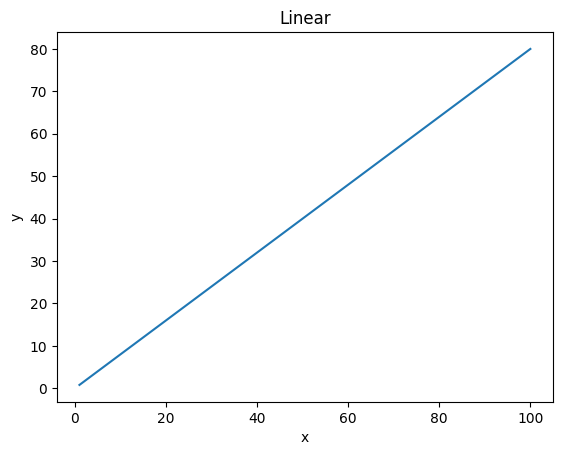

In [8]:
x = [i+1 for i in range(100)]
y = [0.8*(i+1) for i in range(100)]
plt.plot(x,y);
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear")

Text(0.5, 1.0, '$y = log_{10}(x)$')

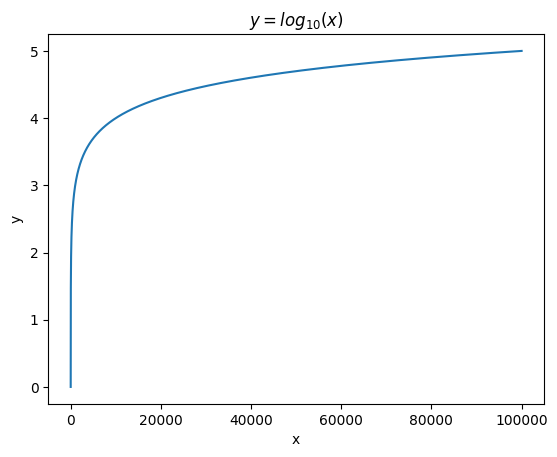

In [35]:
x = [i+1 for i in range(100000)]
plt.plot(x,[math.log10(i) for i in x]);
plt.xlabel("x")
plt.ylabel("y")
plt.title("$y = log_{10}(x)$")

In [7]:
epsilon = 0.00001
print('math.log(1) == 0', math.log10(1))
print('math.log(10) == 1', math.log10(10))
print('math.log(100) == 2', math.log10(100))
print('math.log(1000) == 3', math.log10(1000))
print('math.log(10000) == 4', math.log10(10000))




math.log(1) == 0 0.0
math.log(10) == 1 1.0
math.log(100) == 2 2.0
math.log(1000) == 3 3.0
math.log(10000) == 4 4.0


Text(0.5, 1.0, 'y = log(x)')

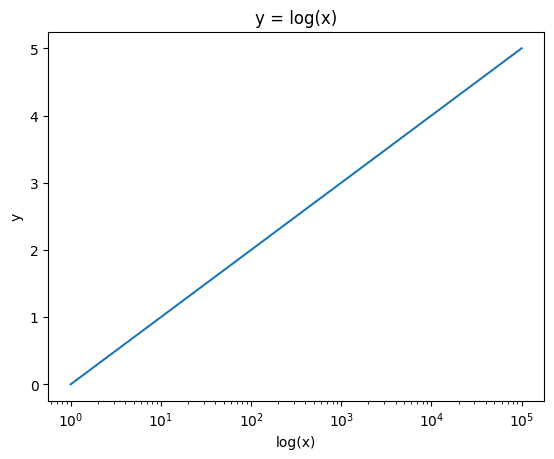

In [36]:
x = [i+1 for i in range(100000)]
plt.semilogx(x,[math.log10(i) for i in x]);
plt.xlabel("log(x)")
plt.ylabel("y")
plt.title("y = log(x)")


Text(0.5, 1.0, 'Growth Rate Comparisons')

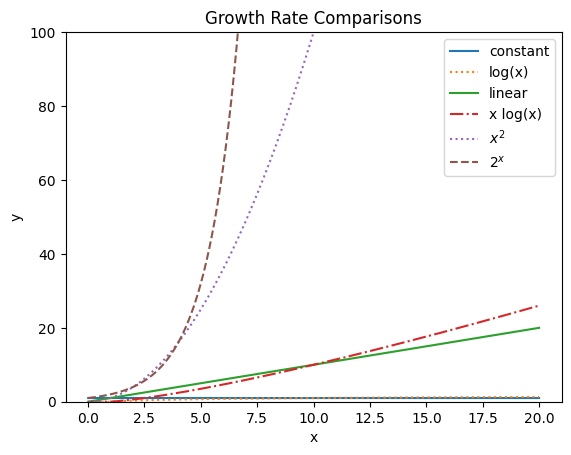

In [37]:
fs = 100
dur = 20
x = [i/fs for i in range(1,dur*fs)]
plt.plot(x,[1 for i in x], label = "constant")
plt.plot(x,[math.log10(i) for i in x], ':', label = "log(x)");
plt.plot(x,x, label = "linear");
plt.plot(x,[i*math.log10(i) for i in x], '-.',  label = "x log(x)")
plt.plot(x,[i**2 for i in x], ':', label = "$x^2$");
plt.plot(x,[2**i for i in x], '--', label = "$2^x$");
plt.ylim(0,100)

plt.legend();

plt.xlabel("x")
plt.ylabel("y")
plt.title("Growth Rate Comparisons")


## Bisection Search

In [29]:
# Recursive Search Example
global count

def bisect_search(mylist, e):
  """Determine if e is in L."""
  global count
  count += 1
  if mylist == []:
    return False
  elif len(mylist) == 1:
    return mylist[0] == e
  else:
    midpoint = len(mylist)//2
    if mylist[midpoint] > e:
      return bisect_search(mylist[:midpoint], e)
    else:
      return bisect_search(mylist[midpoint:], e)

count = 0
list_size = 10000000
elem = list_size-1
print(f"bisect_search([i for i in range({list_size})], {elem})", bisect_search([i for i in range(list_size)], elem))
print("count =", count)

bisect_search([i for i in range(10000000)], 9999999) True
count = 25


- LOOK OUT FOR HIDDEN COMPLEXITY!
- lists!

In [2]:
# testing list copying, is a slice a copy?
L = [i**3 for i in range(20)]
L_new = L[len(L)//2:]
L_new.append('hello')
print(L)
print(L_new)

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859]
[1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 'hello']


## Common markers

| Complexity growth class |Big-O notation | Common Markers |
|-------------------------|---------------|----------------|
| Constant | O(1) |ex1 </br> ex2 </br> ex3|
| Log | O(log(n)) |ex1 </br> ex2 </br> ex3|
| Linear | O(n) |ex1 </br> ex2 </br> ex3|
| Log-linear | O(n log(n)) |ex1 </br> ex2 </br> ex3|
| Quadratic | O($n^2$) |ex1 </br> ex2 </br> ex3|
| Exponential | O($2^n$) |ex1 </br> ex2 </br> ex3|

